In [8]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import pyarrow as pa

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
parquet_file = pq.ParquetFile("/content/drive/MyDrive/QCDToGGQQ_IMGjet_RH1all_jet0_run0_n36272.test.snappy.parquet")

In [3]:
parquet_file.metadata

NameError: ignored

In [4]:
metadata = pq.read_metadata("/content/drive/MyDrive/QCDToGGQQ_IMGjet_RH1all_jet0_run0_n36272.test.snappy.parquet")
metadata.row_group(0)

NameError: ignored

In [ ]:
parquet_file.read_row_group(0)

In [10]:
file_1 = next(parquet_file.iter_batches(batch_size = 8000, columns=['X_jets', 'y'])) 
df = pa.Table.from_batches([file_1]).to_pandas()
del file_1

X_dataset = np.array(np.array(np.array(df['X_jets'].tolist()).tolist()).tolist())
y_dataset = df['y'].to_numpy()

del df

In [11]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=35)

In [13]:
X_train = np.moveaxis(X_train, 1, -1)
X_test = np.moveaxis(X_test, 1, -1)
X_val = np.moveaxis(X_val, 1, -1)

In [14]:
tf.random.set_seed(42)

model = Sequential([
  Conv2D(64, (3,3), activation='relu', input_shape=(125, 125, 3)),
  Conv2D(64, (3,3), activation='relu'),
  MaxPool2D((2,2)),
  Conv2D(128, (3,3), activation='relu'),
  Conv2D(128, (3,3), activation='relu'),
  Conv2D(128, (3,3), activation='relu'),
  Conv2D(128, (3,3), activation='relu'),
  MaxPool2D((2,2)),
  Flatten(),
  Dense(100, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, batch_size=32,
                        epochs=10,
                        validation_data=(X_val, y_val)
                        )

Epoch 1/10
180/180 [==============================] - 32s 97ms/step - loss: 0.6364 - accuracy: 0.6623 - val_loss: 0.5963 - val_accuracy: 0.6922
Epoch 2/10
180/180 [==============================] - 17s 92ms/step - loss: 0.5922 - accuracy: 0.6960 - val_loss: 0.5875 - val_accuracy: 0.6953
Epoch 3/10
180/180 [==============================] - 16s 91ms/step - loss: 0.5592 - accuracy: 0.7217 - val_loss: 0.6021 - val_accuracy: 0.6938
Epoch 4/10
180/180 [==============================] - 16s 91ms/step - loss: 0.5273 - accuracy: 0.7437 - val_loss: 0.5910 - val_accuracy: 0.7047
Epoch 5/10
180/180 [==============================] - 16s 91ms/step - loss: 0.4807 - accuracy: 0.7755 - val_loss: 0.6498 - val_accuracy: 0.6781
Epoch 6/10
180/180 [==============================] - 16s 91ms/step - loss: 0.4064 - accuracy: 0.8165 - val_loss: 0.8991 - val_accuracy: 0.6375
Epoch 7/10
180/180 [==============================] - 16s 90ms/step - loss: 0.2757 - accuracy: 0.8882 - val_loss: 0.9583 - val_accuracy:

In [15]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

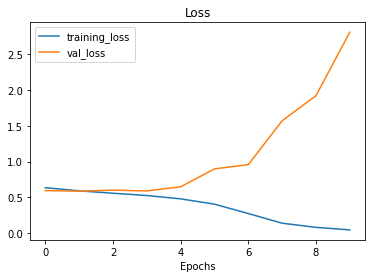

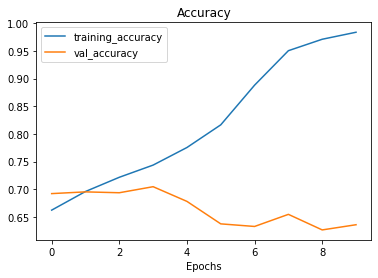

In [16]:
plot_loss_curves(history)

In [17]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

50/50 [==============================] - 1s 27ms/step - loss: 2.7398 - accuracy: 0.6219
Loss = 2.7397522926330566
Test Accuracy = 0.621874988079071


In [18]:
y_pred = model.predict(X_test)
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.4f}")

50/50 [==============================] - 1s 25ms/step
ROC AUC: 0.6799
